In [1]:
import psycopg2
from config import local_host, local_name, local_port, local_user
from creds import local_db_password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
conn = psycopg2.connect(dbname=local_name, user =local_user, host=local_host, password=local_db_password, port =local_port)
cur = conn.cursor()

In [2]:
defender_sql = """
select
	player_id,
	current_team_id,
	minutes,
	coalesce((goals_total+assists) *1.0 / nullif(minutes,0), 0) as points_per_minute,
	coalesce(shots_total * 1.0 / nullif(minutes, 0), 0) as shots_per_minute,
	coalesce(shots_on * 1.0 / nullif(shots_total, 0), 0) as shots_on_rate,
	coalesce(goals_total * 1.0 / nullif(shots_on, 0), 0) as goals_per_shot_on,
	coalesce(dribbles_attempted *1.0 / nullif(minutes, 0), 0) as dribbles_per_minute,
	coalesce(dribbles_success / nullif(dribbles_attempted, 0), 0) as dribble_success_rate,
	coalesce(passes_total * 1.0 / nullif(minutes, 0), 0) as passes_per_minute,
	coalesce(passes_accuracy *1.0 / nullif(passes_total, 0), 0) as pass_accuracy,
	coalesce(passes_key * 1.0 / nullif(passes_accuracy, 0), 0) as key_pass_percentage,
	coalesce(assists *1.0 / nullif(passes_key, 0), 0) as assist_rate_per_key_pass,
	coalesce((tackles_total + interceptions + blocks)*1.0 / nullif(minutes, 0), 0) as defensive_moves_per_minute,
	coalesce(foul_committed * 1.0 / nullif(minutes, 0), 0) as fouls_committed_per_minute,
	coalesce(foul_drawn * 1.0 / nullif(minutes, 0), 0) as fouls_drawn_per_minute,
	coalesce(cards_yellow *1.0 / nullif(minutes, 0), 0) as cards_yellow_per_minute,
	coalesce(cards_red *1.0 / nullif(minutes, 0), 0) as cards_red_per_minute,
	coalesce(penalty_committed * 1.0 / nullif(minutes, 0), 0) as penalties_committed_per_minute
from ffl_prod.player_summaries
where position != 'Defender' and minutes > 0
"""

In [3]:
df = pd.read_sql(defender_sql, conn)
df.head()

C:\Users\STEKIT~1\AppData\Local\Temp/ipykernel_31948/3916341667.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(defender_sql, conn)


,player_id,current_team_id,minutes,points_per_minute,shots_per_minute,shots_on_rate,goals_per_shot_on,dribbles_per_minute,dribble_success_rate,passes_per_minute,pass_accuracy,key_pass_percentage,assist_rate_per_key_pass,defensive_moves_per_minute,fouls_committed_per_minute,fouls_drawn_per_minute,cards_yellow_per_minute,cards_red_per_minute,penalties_committed_per_minute
0,14,51,454,0.002203,0.008811,0.250000,0.000000,0.011013,0,0.715859,0.870769,0.035336,0.10,0.024229,0.013216,0.004405,0.002203,0.002203,0.0
1,18,33,76,0.000000,0.000000,0.000000,0.000000,0.078947,0,0.539474,0.829268,0.029412,0.00,0.026316,0.000000,0.026316,0.000000,0.000000,0.0
2,22,44,1279,0.004691,0.022674,0.551724,0.375000,0.039875,0,0.357310,0.768053,0.071225,0.00,0.014073,0.010164,0.005473,0.000782,0.000000,0.0
3,44,50,2938,0.005786,0.015657,0.478261,0.363636,0.019061,0,1.235534,0.924518,0.014899,0.18,0.035398,0.013955,0.011913,0.002723,0.000340,0.0
4,49,42,788,0.000000,0.006345,0.400000,0.000000,0.013959,0,0.788071,0.903382,0.010695,0.00,0.035533,0.012690,0.007614,0.003807,0.000000,0.0


C:\Users\stekitay1\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\stekitay1\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])


LinAlgError: singular matrix

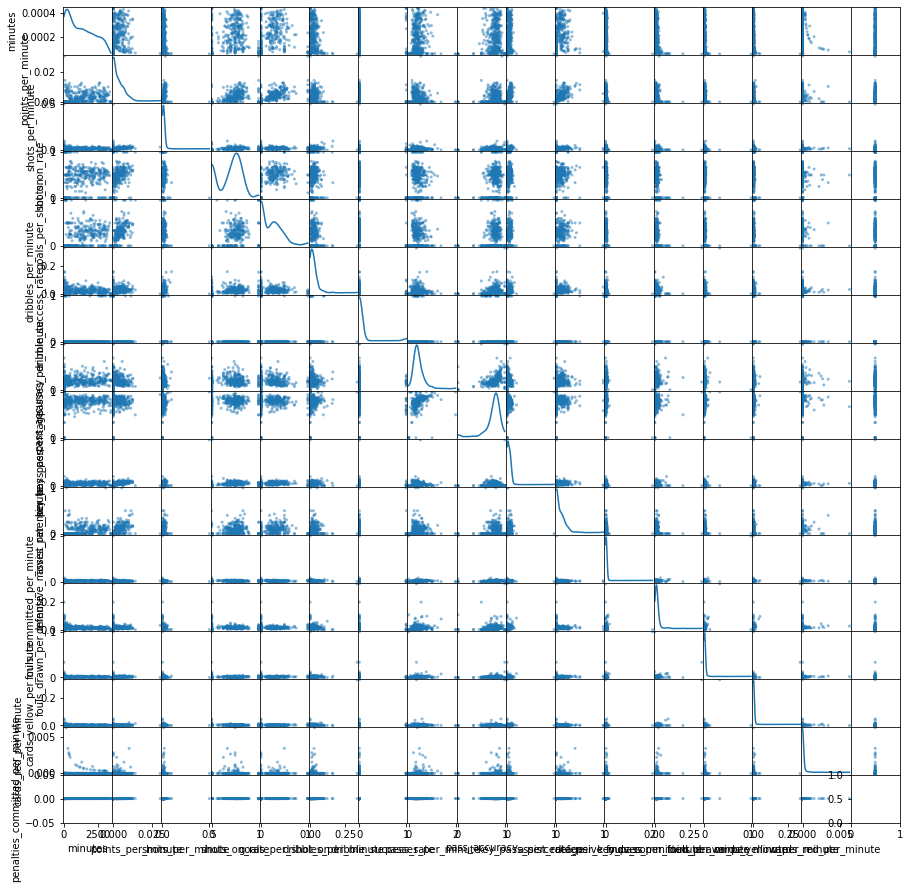

In [4]:
qual_cols = ['player_id', 'current_team_id']
axes = pd.plotting.scatter_matrix(df.drop(qual_cols, axis=1), figsize=(15,15), diagonal='kde', alpha=0.5)
corr = df.drop(qual_cols, axis=1).corr().to_numpy()
for i, j in zip(*plt.np.tril_indices_from(axes, k=-1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')